In [17]:
# 加载模型
# 加载模型
import torch
from stable_baselines3 import DQN
import pandas as pd

# model = DQN.load("./model/SACE_dqn_model",device='cpu')
# model_lane_change = model.policy.q_net.q_net
model_path = "dqn_follow.zip"
device = 'cpu'  # 如果需要在 GPU 上推断，可以改为 'cuda'
model = DQN.load(model_path, device=device)
model_q_net = model.policy.q_net.q_net
# data = torch.load("./data/SACE_dqn_data.pth")
# data_x = torch.stack(data)
data_pd = pd.read_csv("data_1.csv")
data_pd['field.f1_speed'] = data_pd['field.f1_speed'] - data_pd['field.ego_speed']
data_x = torch.tensor(data_pd.values, dtype=torch.float32)

Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: an integer is required (got type bytes)
Could not deserialize object exploration_schedule. Consider using `custom_objects` argument to replace this object.
Exception: an integer is required (got type bytes)


In [18]:
from FullyNet_Shapleyflowtest import FullyNet_Shapleyflow

In [19]:
# max_indices = torch.argmax(model_q_net(data_x), dim=1)
# 找到每组输出的最大值及其索引
max_values, max_indices = torch.max(model_q_net(data_x), dim=1) # 所有被选择的决策索引，及其输出值
# 找到最大值中的最小值的索引
min_indices_in_max_values = torch.argmin(max_values)  # 输出值最小的索引，正定基值点索引

In [20]:
background = data_x[min_indices_in_max_values:min_indices_in_max_values + 1]
test_aa = FullyNet_Shapleyflow(model_q_net, background)
pos_shap = test_aa.calculate_shapley_flow(data_x)

In [21]:
model_q_net(data_x[min_indices_in_max_values:min_indices_in_max_values + 1])

tensor([[-0.5662, -0.6229, -0.7714]], grad_fn=<AddmmBackward0>)

In [22]:
max_values.min()

tensor(-0.5662, grad_fn=<MinBackward1>)

In [23]:
import shap
shap_deep = shap.DeepExplainer(model_q_net, data_x[0:20])

In [24]:
shap_deep_shapley = shap_deep.shap_values(data_x)

In [25]:
import numpy as np
shap_deep_shapley_np = np.stack(shap_deep_shapley).swapaxes(0, 1)

In [26]:
pos_shap_np = torch.stack(pos_shap).numpy()

In [27]:
large_vectors_0_list = []
large_vectors_0_list.append(pos_shap_np[10][max_indices.numpy()[10]])

In [28]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('default')  # 设置画图的风格
fontsize = 12
from matplotlib import cm
# 计算每个向量的元素和
large_vectors_0_list = []
# large_vectors_0 = pos_shap_np[:,max_indices.numpy(),:]
for i in range(len(pos_shap_np)):
    large_vectors_0_list.append(pos_shap_np[i][max_indices.numpy()[i]])

sums_large_0_list = []
for i in range(len(shap_deep_shapley_np)):
    sums_large_0_list.append(shap_deep_shapley_np[i][max_indices.numpy()[i]])
large_vectors_0 = np.array(large_vectors_0_list)
small_vectors_0 = np.array(sums_large_0_list)
sums_large_0 = large_vectors_0.sum(axis=1)
sums_small_0 = small_vectors_0.sum(axis=1)

# 根据元素和的大小设置颜色映射
norm = plt.Normalize(min(sums_large_0.min(), sums_small_0.min()), max(sums_large_0.max(), sums_small_0.max()))
cmap = cm.hot  # 使用热力图颜色映射

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

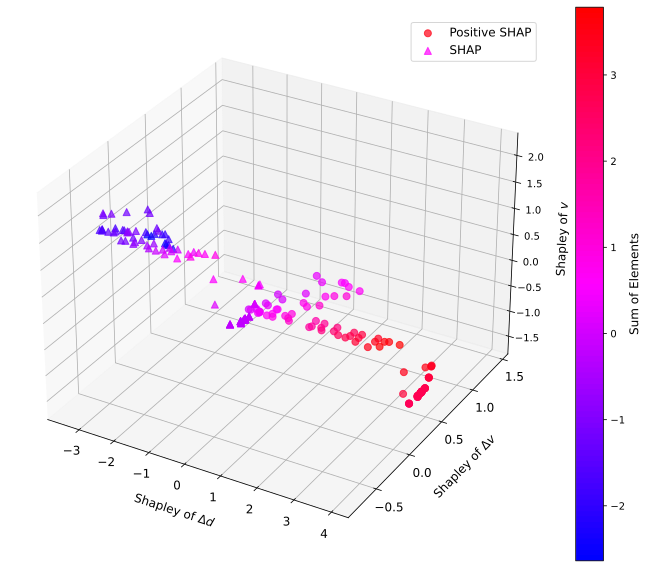

In [37]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# 自定义颜色映射
colors = [(0, 0, 1), (0.5, 0, 1), (1, 0, 1), (1, 0, 0.5), (1, 0, 0)]  # 蓝色到红色的渐变
n_bins = 100  # 定义颜色映射中的细分数量
custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# 重新绘制图形，使用自定义的颜色映射
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制向量，颜色由自定义的颜色映射决定
sc1 = ax.scatter(large_vectors_0[:, 0], large_vectors_0[:, 1], large_vectors_0[:, 2], c=sums_large_0, cmap=custom_cmap, marker='o', s=50, label='Positive SHAP', alpha=0.7, norm=norm)
sc2 = ax.scatter(small_vectors_0[:, 0], small_vectors_0[:, 1], small_vectors_0[:, 2], c=sums_small_0, cmap=custom_cmap, marker='^', s=50, label='SHAP', alpha=0.7, norm=norm)

# 设置标签和图例
ax.set_xlabel('Shapley of $\Delta d$', fontsize=12, labelpad=10)
ax.set_ylabel('Shapley of $\Delta v$', fontsize=12, labelpad=10)
ax.set_zlabel('Shapley of $v$', fontsize=12, labelpad=10)
ax.legend(loc='upper right', frameon=True, fontsize=fontsize)

plt.xticks(fontname='Arial', fontsize=fontsize)
plt.yticks(fontname='Arial', fontsize=fontsize)
# 添加颜色条，使用自定义颜色映射
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=custom_cmap), ax=ax)
cbar.set_label('Sum of Elements', fontsize=fontsize)
plt.savefig('figure/质量比较.svg', dpi=600, bbox_inches='tight')
plt.show()

In [30]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('default')  # 设置画图的风格
fontsize = 12
from matplotlib import cm
# 计算每个向量的元素和
large_vectors_0_list = []
# large_vectors_0 = pos_shap_np[:,max_indices.numpy(),:]
for i in range(len(pos_shap_np)):
    large_vectors_0_list.append(pos_shap_np[i][max_indices.numpy()[i]])
    
sums_large_0_list = []
# large_vectors_0 = pos_shap_np[:,max_indices.numpy(),:]
for i in range(len(shap_deep_shapley_np)):
    sums_large_0_list.append(shap_deep_shapley_np[i][max_indices.numpy()[i]])
large_vectors_0 = np.array(large_vectors_0_list)
small_vectors_0 = np.array(sums_large_0_list)
sums_large_0 = large_vectors_0.sum(axis=1)
sums_small_0 = small_vectors_0.sum(axis=1)

# 根据元素和的大小设置颜色映射
norm = plt.Normalize(min(sums_large_0.min(), sums_small_0.min()), max(sums_large_0.max(), sums_small_0.max()))
cmap = cm.hot  # 使用热力图颜色映射

# 自定义颜色映射
colors = [(0, 0, 1), (0.5, 0, 1), (1, 0, 1), (1, 0, 0.5), (1, 0, 0)]  # 蓝色到红色的渐变
n_bins = 100  # 定义颜色映射中的细分数量
custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)



NameError: name 'x' is not defined

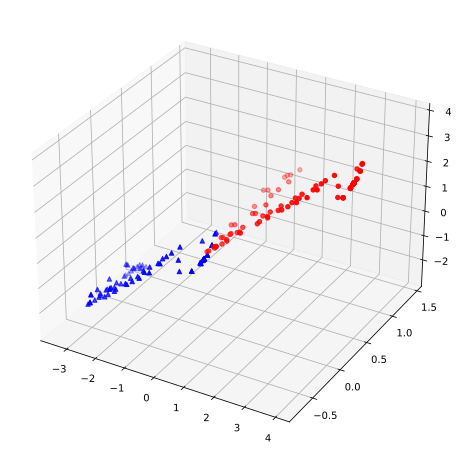

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# large_vectors_0[:, 0], large_vectors_0[:, 1], large_vectors_0[:, 2], c=sums_large_0
# small_vectors_0[:, 0], small_vectors_0[:, 1], small_vectors_0[:, 2], c=sums_small_0


# 绘制三维散点图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制第一组数据
ax.scatter(large_vectors_0[:, 0], large_vectors_0[:, 1], sums_large_0, c='r', marker='o', label='Positive SHAP')

# 绘制第二组数据，使用不同的点型和颜色
ax.scatter(small_vectors_0[:, 0], small_vectors_0[:, 1], sums_small_0, c='b', marker='^', label='SHAP')
z = np.zeros_like(sums_large_0)  # z 轴为0的平面
ax.plot_surface(x, y, z, color='gray', alpha=0.5, rstride=100, cstride=100)
ax.set_xlabel('Shapley of $\Delta d$')
ax.set_ylabel('Shapley of $\Delta v$')
ax.set_zlabel('Shapley Sum of $\Delta d$ and $\Delta v$')

# plt.title('3D Scatter Plot')
plt.legend()
plt.show()

In [ ]:
sums_small_0.min()

In [ ]:
sums_large_0.min()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 假设 large_vectors_0, small_vectors_0, sums_large_0, sums_small_0 已经定义
# 这里创建一些示例数据来演示
np.random.seed(0)
# large_vectors_0 = np.random.rand(100, 2) * 10
# small_vectors_0 = np.random.rand(100, 2) * 10
sums_large_0 = large_vectors_0[:, 0] + large_vectors_0[:, 1]
sums_small_0 = small_vectors_0[:, 0] + small_vectors_0[:, 1]
# 筛选出 sums_small_0 大于等于0和小于0的数据
positive_mask = sums_small_0 >= 0
negative_mask = sums_small_0 < 0

positive_vectors = small_vectors_0[positive_mask]
negative_vectors = small_vectors_0[negative_mask]
positive_sums = sums_small_0[positive_mask]
negative_sums = sums_small_0[negative_mask]
# 绘制三维散点图
fig = plt.figure(figsize=(6, 16))
ax = fig.add_subplot(111, projection='3d')

# 绘制第一组数据
ax.scatter(large_vectors_0[:, 0], large_vectors_0[:, 1], sums_large_0, c='r', marker='o', label='Positive SHAP>=0')

# 绘制第二组数据，使用不同的点型和颜色
ax.scatter(positive_vectors[:, 0], positive_vectors[:, 1], positive_sums, c='b', marker='^', label='SHAP>=0')

# 绘制第二组数据，使用不同的点型和颜色
ax.scatter(negative_vectors[:, 0], negative_vectors[:, 1], negative_sums, c='g', marker='^', label='SHAP<0')

ax.set_xlabel('Shapley of $\Delta d$')
ax.set_ylabel('Shapley of $\Delta v$')
ax.set_zlabel('Shapley Sum of $\Delta d$ and $\Delta v$')

# 调整 Z 轴标签的位置和旋转角度
ax.zaxis.labelpad = 20  # 增加labelpad以调整标签位置
# ax.zaxis.set_rotate_label(False)  # 禁止标签自动旋转
# ax.zaxis.label.set_rotation(90)  # 手动设置标签旋转角度
# 在纵轴为0处绘制透明的水平截面
x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 10)
y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 10)
x, y = np.meshgrid(x, y)
z = np.zeros_like(x)  # z 轴为0的平面

ax.plot_surface(x, y, z, color='gray', alpha=0.5, rstride=100, cstride=100)
plt.legend()
plt.savefig('figure/质量比较.svg', dpi=600, bbox_inches='tight')
# 添加图例和显示图形
plt.show()
plt.close()